In [7]:
# Load project functions
import crypto_monetary_base as cmb

In [26]:
import pandas as pd
import datetime
import tqdm

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [27]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.9.1 64bit [GCC 5.4.0 20160609]
IPython 7.19.0
OS Linux 5.8.0 0.bpo.2 amd64 x86_64 with glibc2.28
pandas 1.2.0
matplotlib 3.3.3
seaborn 0.11.1
Sun Jan 10 14:03:06 2021 EST

## Supply Curve Calculation

In [28]:
COIN_SYMBOL = 'SMH'

In [29]:
def smh_block_supply_curve(
    num_blocks,
    premine_amount=(1.5 * 1e6),
    output_granularity=10000,
    ):
    out = [
        # Block num,
        # Total supply - Plan1,
        # Total supply - Plan2,
    ]
    
    block_reward = current_block_reward = 50
    
    y_1 = premine_amount
    y_2 = premine_amount
    for block in tqdm.notebook.tqdm(range(1, num_blocks+1)):
        y_1 += block_reward
        y_2 += current_block_reward
        
        if (block-1) % output_granularity == 0:
            out.append([block, y_1, y_2])

    return out

In [30]:
def datetime_smh_supply_curve(
    start_date,
    block_time,
    block_supply,
    output_granularity=10000,
    ):
    df = pd.DataFrame(
        block_supply, columns=['block', 'plan1', 'plan2']
    )
    df['plan1_pct'] = (
        df['plan1'] / df['plan1'].values[-1]
        * 100
    )
    df['plan2_pct'] = (
        df['plan2'] / df['plan2'].values[-1]
        * 100
    )
    df['date'] = pd.date_range(
        start=start_date,
        freq=block_time * output_granularity,
        periods=len(df)
    )
    return df

In [36]:
def plot_smh_supply_curve(
    supply,
    coin_name='SMH',
    plot_pct=False,
    max_size=10000,
    out_name='',
    ):
    max_size = min((max_size, len(supply)))
    step_size = int(len(supply) / max_size)
    dates = mpl.dates.date2num(supply.date.values[::step_size])
    
    # Plan1
    if plot_pct:
        values = supply.plan1_pct.values[::step_size]
    else:
        values = supply.plan1.values[::step_size]
    plt.plot_date(
        dates,
        values,
        fmt='--',
        lw=4,
        label='plan1',
    )
    
    # Plan2
    if plot_pct:
        values = supply.plan2_pct.values[::step_size]
    else:
        values = supply.plan2.values[::step_size]
    plt.plot_date(
        dates,
        values,
        fmt='-',
        lw=4,
        label='plan2',
        color='orange',
    )
    
    # Plot current date
    #mask = supply.date > datetime.datetime.now()
    #current_supply = supply[mask].iloc[0]
    #dates = mpl.dates.date2num([current_supply.date])
    #if plot_pct:
    #    values = [current_supply.plan1_pct]
    #else:
    #    values = [current_supply.plan1]
    #plt.plot(
    #    dates,
    #    values,
    #    'o',
    #    color='black',
    #    ms=6,
    #    label=current_supply.date.strftime('%Y'),
    #)
    
    plt.title(
        fr'$\textbf{{{coin_name}}}$ Monetary Base',
        y=1.05
    )
    plt.legend()
    
    ax = plt.gca()
    if plot_pct:
        ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())
    
    if not out_name:
        out_name = coin_name
    plt.savefig(
        f'../charts/{out_name}.png',
        bbox_inches='tight',
        dpi=300
    )
    return plt

In [37]:
start_date = datetime.date(2021, 7, 1)
end_date = datetime.date(2140, 10, 7)
block_time = datetime.timedelta(minutes=10)

num_blocks = int(
    ((end_date - start_date).days * 24 * 3600)
    / block_time.seconds
)

block_supply = smh_block_supply_curve(
    num_blocks=num_blocks,
)

supply = datetime_smh_supply_curve(
    start_date=start_date,
    block_time=block_time,
    block_supply=block_supply,
)

  0%|          | 0/6272928 [00:00<?, ?it/s]

In [38]:
display(supply.head())
display(supply.tail())

,block,plan1,plan2,plan1_pct,plan2_pct,date
0,1,1500050.0,1500050.0,0.476206,0.476206,2021-07-01 00:00:00
1,10001,2000050.0,2000050.0,0.634936,0.634936,2021-09-08 10:40:00
2,20001,2500050.0,2500050.0,0.793667,0.793667,2021-11-16 21:20:00
3,30001,3000050.0,3000050.0,0.952397,0.952397,2022-01-25 08:00:00
4,40001,3500050.0,3500050.0,1.111127,1.111127,2022-04-04 18:40:00


,block,plan1,plan2,plan1_pct,plan2_pct,date
623,6230001,313000050.0,313000050.0,99.365079,99.365079,2139-12-13 21:20:00
624,6240001,313500050.0,313500050.0,99.523810,99.523810,2140-02-21 08:00:00
625,6250001,314000050.0,314000050.0,99.682540,99.682540,2140-04-30 18:40:00
626,6260001,314500050.0,314500050.0,99.841270,99.841270,2140-07-09 05:20:00
627,6270001,315000050.0,315000050.0,100.000000,100.000000,2140-09-16 16:00:00


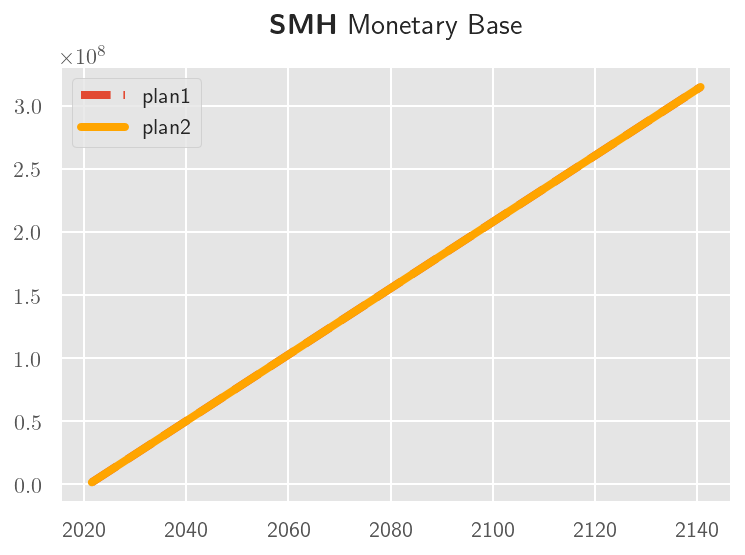

In [39]:
plot_smh_supply_curve(supply);

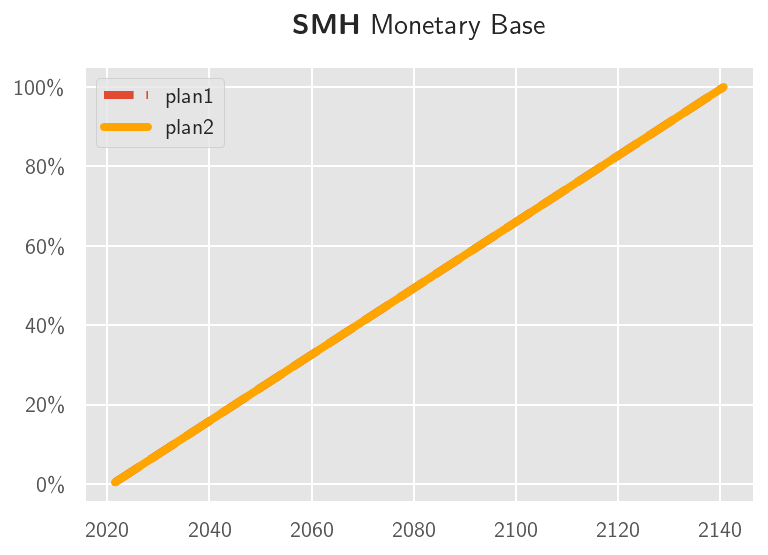

In [40]:
plot_smh_supply_curve(supply, plot_pct=True, out_name='SMH_pct');

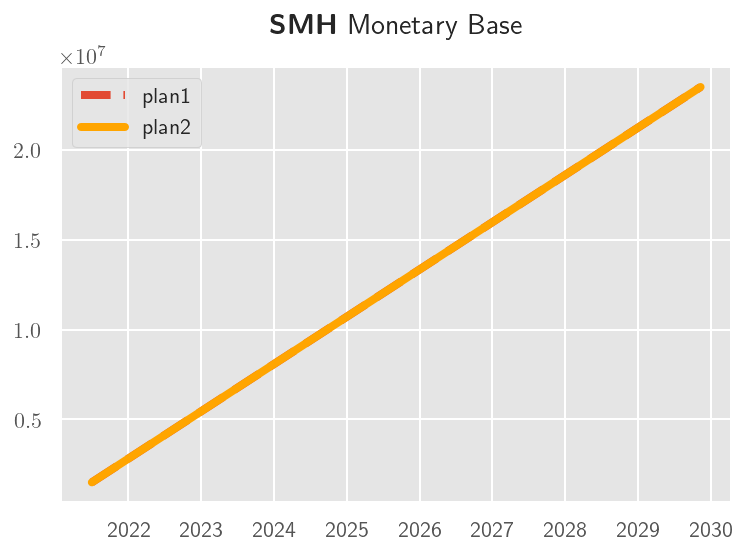

In [41]:
mask = supply.date < datetime.datetime(2030, 1, 1)
plot_smh_supply_curve(supply[mask], out_name='SMH_zoom');

## Standardize Time Series

In [42]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 628 lines to file ../output-data/SMH_weekly.csv


,coin,block,plan1,plan2,plan1_pct,plan2_pct,date
0,SMH,1,1500050.0,1500050.0,0.476206,0.476206,2021-07-01
1,SMH,10001,2000050.0,2000050.0,0.634936,0.634936,2021-09-01
2,SMH,20001,2500050.0,2500050.0,0.793667,0.793667,2021-11-01
3,SMH,30001,3000050.0,3000050.0,0.952397,0.952397,2022-01-01
4,SMH,40001,3500050.0,3500050.0,1.111127,1.111127,2022-04-01


,coin,block,plan1,plan2,plan1_pct,plan2_pct,date
623,SMH,6230001,313000050.0,313000050.0,99.365079,99.365079,2139-12-01
624,SMH,6240001,313500050.0,313500050.0,99.523810,99.523810,2140-02-01
625,SMH,6250001,314000050.0,314000050.0,99.682540,99.682540,2140-04-01
626,SMH,6260001,314500050.0,314500050.0,99.841270,99.841270,2140-07-01
627,SMH,6270001,315000050.0,315000050.0,100.000000,100.000000,2140-09-01


In [14]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 1504 lines to file ../output-data/ETH_monthly.csv


,coin,block,original_whitepaper,current_plan,original_whitepaper_pct,current_plan_pct,date
0,ETH,1,7.200001e+07,7.200001e+07,3.553441,10.561781,2015-07-01
1,ETH,20001,7.214841e+07,7.214841e+07,3.560765,10.583550,2015-08-01
2,ETH,200001,7.348401e+07,7.348401e+07,3.626681,10.779471,2015-09-01
3,ETH,370001,7.474541e+07,7.474541e+07,3.688935,10.964508,2015-10-01
4,ETH,550001,7.608101e+07,7.608101e+07,3.754852,11.160429,2015-11-01


,coin,block,original_whitepaper,current_plan,original_whitepaper_pct,current_plan_pct,date
1499,ETH,262640001,2.020789e+09,6.781620e+08,99.732673,99.480521,2140-06-01
1500,ETH,262820001,2.022124e+09,6.790335e+08,99.798589,99.608360,2140-07-01
1501,ETH,263000001,2.023460e+09,6.799061e+08,99.864505,99.736364,2140-08-01
1502,ETH,263170001,2.024721e+09,6.807312e+08,99.926760,99.857408,2140-09-01
1503,ETH,263350001,2.026057e+09,6.816060e+08,99.992676,99.985732,2140-10-01


In [15]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 126 lines to file ../output-data/ETH_yearly.csv


,coin,block,original_whitepaper,current_plan,original_whitepaper_pct,current_plan_pct,date
0,ETH,1,7.200001e+07,7.200001e+07,3.553441,10.561781,2015-07-01
1,ETH,900001,7.867801e+07,7.867801e+07,3.883022,11.541386,2016-01-01
2,ETH,3010001,9.433421e+07,9.358400e+07,4.655708,13.727967,2017-01-01
3,ETH,5110001,1.099162e+08,1.025640e+08,5.424732,15.045255,2018-01-01
4,ETH,7210001,1.254982e+08,1.086540e+08,6.193755,15.938606,2019-01-01


,coin,block,original_whitepaper,current_plan,original_whitepaper_pct,current_plan_pct,date
121,ETH,253350001,1.951857e+09,6.346697e+08,96.330658,93.100584,2136-01-01
122,ETH,255460001,1.967513e+09,6.442965e+08,97.103344,94.512744,2137-01-01
123,ETH,257560001,1.983095e+09,6.540226e+08,97.872368,95.939479,2138-01-01
124,ETH,259670001,1.998751e+09,6.639429e+08,98.645053,97.394699,2139-01-01
125,ETH,261770001,2.014333e+09,6.739655e+08,99.414077,98.864938,2140-01-01
